In [1]:
#!pip install torch
#!pip install seaborn
#!pip install pyodbc

In [2]:
#import torch
#if torch.cuda.is_available:
#    print('ok')

In [3]:

# importing python utility libraries
import os
import sys
import random
import io
import urllib
import pyodbc

from datetime import datetime


# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing python plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from IPython.display import Image, display

#------> falls Kernel imnmer wieder abstürzt: 
#          alle Befehle ab hier auskommentieren, 
#          und einzeln wieder scharf schalten und jeweils den Teil 
#          ab hier bis zum malen einer Chart laufen lassen

# importing pytorch libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim

# init deterministic seed
#USE_CUDA = True
seed_value = 1234
rd.seed(seed_value) # set random seed
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU

#------->     bis hier
    
#load data
pyodbc.setDecimalSeparator('.')
cnxn = pyodbc.connect('Driver={SQL Server Native Client 11.0};' +
                                    'SERVER=DEFRNVMPGLDSQ22\INST1;' +
                                    'DATABASE=Test_RBA;' +
                                    'Trusted_Connection=yes')
data = pd.read_sql("SELECT * FROM [dbo].[022_S4_20_Generali_HGB4_Journal_Entries_BU0400]", cnxn)

data.head(10)

,ID,GL Account Number,Functional Amount Haben,Functional Amount Soll,Effective Date,Effective Weekday,Period,Entry Date,Entry Weekday,Source,...,JE Description,JE Line Description,ey_sys_man_ind,GL Account Name,Account Type,Account Class,Account Sub Type,Account Sub Class,BilPosSL,Label
0,1913000009_242,0098130008,162.00,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
1,1913000009_243,0098130008,101.39,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
2,1913000009_244,0098130008,101.39,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
3,1913000009_245,0098130008,40.77,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
4,1913000009_246,0098130008,40.77,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
5,1913000009_247,0098130008,162.00,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
6,1913000009_248,0098130008,101.39,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
7,1913000009_249,0098130008,162.00,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
8,1913000009_250,0098130008,25.61,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular
9,1913000009_251,0098130008,92.29,0.0,2020-02-14,Friday,02,2020-02-14,Friday,9Q,...,PP0000002413,,Manual,Belegschaftsaktien-Mitarbeitereinbehalt,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular


In [4]:
# init the plots
#fig, ax = plt.subplots(1,2)
#fig.set_figwidth(20)

# plot distribution of the local amount attribute
#g = sns.distplot(data['Functional Amount Soll'].tolist(), ax=ax[0])
#g.set_title('Distribution of Functional Amount Soll values')

# set axis-labels 
#ax[0].set_xlabel('Functional Amount')
#ax[0].set_ylabel('density')

# plot distribution of the document amount attribute
#g = sns.distplot(data['Functional Amount Haben'].tolist(), ax=ax[1])
#g.set_title('Distribution of Functional Amount Haben values')

# set axis-labels
#ax[1].set_xlabel('Functional Amount')
#ax[1].set_ylabel('density');

In [5]:
data.Label.value_counts()

regular                    134002
Anomalie                        6
erfundene Buchung               2
erfundener Buchungssatz         2
Name: Label, dtype: int64

In [6]:
# print current Python version
#now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
#print('[LOG {}] The Python version: {}'.format(now, sys.version))
#data_subset_transformed.shape
#!nvidia-smi

In [7]:
label = data.pop('Label')

# select categorical attributes to be "one-hot" encoded
#categorical_attr_names = ['Effective Date', 'Period', 'Entry Date', 'Source', 'Preparer ID', 'ey_sys_man_ind','Account Type','Account Class','Account Sub Type','Account Sub Class']
categorical_attr_names = ['GL Account Number','Effective Date','Effective Weekday','Entry Date','Entry Weekday','Source','Preparer ID','ey_sys_man_ind','BilPosSL']
#,'Account Type','Account Class','Account Sub Type','Account Sub Class'

# encode categorical attributes into a binary one-hot encoded representation 
data_categ_transformed = pd.get_dummies(data[categorical_attr_names])

data_categ_transformed.head(10)

################################################################################################################################

# select "Functional Amount" attribute
numeric_attr_names = ['Functional Amount Soll', 'Functional Amount Haben']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = data[numeric_attr_names] + 1e-4
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
data_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())
data_numeric_attr.head(10)

################################################################################################################################

data_subset_transformed = pd.concat([data_categ_transformed, data_numeric_attr], axis = 1)
data_subset_transformed.head(10)

,GL Account Number_0005199943,GL Account Number_0005199960,GL Account Number_0005699913,GL Account Number_0010221001,GL Account Number_0010231001,GL Account Number_0010231004,GL Account Number_0010231014,GL Account Number_0010231019,GL Account Number_0010231020,GL Account Number_0010231030,...,BilPosSL_P20560019,BilPosSL_P20560094,BilPosSL_P2058010,BilPosSL_P2058020,BilPosSL_P205803001,BilPosSL_P205803013,BilPosSL_Y9050000,BilPosSL_Y9131000,Functional Amount Soll,Functional Amount Haben
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.428139
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.414106
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.414106
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.386826
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.386826
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.428139
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.414106
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.428139
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.372903
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.411290


In [8]:
#data_subset_transformed.memory_usage(index=True).sum()

In [9]:
# init the plots
#fig, ax = plt.subplots(1,2)
#fig.set_figwidth(20)

# plot distribution of the local amount attribute
#g = sns.distplot(data_numeric_attr['Functional Amount Soll'].tolist(), ax=ax[0])
#g.set_title('Distribution of scaled Functional Amount Soll values')

# set axis-labels 
#ax[0].set_xlabel('Functional Amount')
#ax[0].set_ylabel('density')

# plot distribution of the local amount attribute
#g = sns.distplot(data_numeric_attr['Functional Amount Haben'].tolist(), ax=ax[1])
#g.set_title('Distribution of scaled Functional Amount Haben values')

# set axis-labels
#ax[1].set_xlabel('Functional Amount')
#ax[1].set_ylabel('density');

In [10]:
#print(torch.backends.cudnn.is_available())
#print(torch.backends.cudnn.version())
#print(torch.backends.cudnn.enabled)
#torch.backends.cudnn.benchmark = True
#torch.backends.cudnn.enabled = True

[LOG 20210915-07:15:37] encoder-generator architecture:

Encoder(
  (map_L1): Linear(in_features=1359, out_features=256, bias=True)
  (map_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L2): Linear(in_features=256, out_features=64, bias=True)
  (map_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L3): Linear(in_features=64, out_features=16, bias=True)
  (map_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L4): Linear(in_features=16, out_features=4, bias=True)
  (map_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L5): Linear(in_features=4, out_features=2, bias=True)
  (map_R5): LeakyReLU(negative_slope=0.4, inplace=True)
)

[LOG 20210915-07:15:37] decoder architecture:

Decoder(
  (map_L1): Linear(in_features=2, out_features=4, bias=True)
  (map_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L2): Linear(in_features=4, out_features=16, bias=True)
  (map_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L3): Linear(in_features=16, out_featu

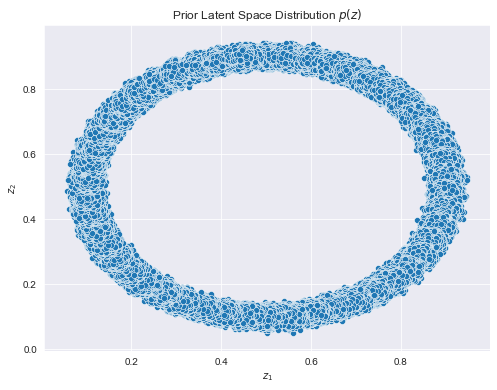

In [11]:
# define encoder class
class Encoder(nn.Module):

    # define class constructor
    def __init__(self, input_size, hidden_size):

        # call super class constructor
        super(Encoder, self).__init__()

        # specify first layer - in 618, out 256
        self.map_L1 = nn.Linear(input_size, hidden_size[0], bias=True) # init linearity
        nn.init.xavier_uniform_(self.map_L1.weight) # init weights according to [9]
        nn.init.constant_(self.map_L1.bias, 0.0) # constant initialization of the bias
        self.map_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify second layer - in 256, out 64
        self.map_L2 = nn.Linear(hidden_size[0], hidden_size[1], bias=True)
        nn.init.xavier_uniform_(self.map_L2.weight)
        nn.init.constant_(self.map_L2.bias, 0.0)
        self.map_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify third layer - in 64, out 16
        self.map_L3 = nn.Linear(hidden_size[1], hidden_size[2], bias=True)
        nn.init.xavier_uniform_(self.map_L3.weight)
        nn.init.constant_(self.map_L3.bias, 0.0)
        self.map_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify fourth layer - in 16, out 4
        self.map_L4 = nn.Linear(hidden_size[2], hidden_size[3], bias=True)
        nn.init.xavier_uniform_(self.map_L4.weight)
        nn.init.constant_(self.map_L4.bias, 0.0)
        self.map_R4 = torch.nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify fifth layer - in 4, out 2
        self.map_L5 = nn.Linear(hidden_size[3], hidden_size[4], bias=True)
        nn.init.xavier_uniform_(self.map_L5.weight)
        nn.init.constant_(self.map_L5.bias, 0.0)
        self.map_R5 = torch.nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
    # define forward pass
    def forward(self, x):

        # run forward pass through the network
        x = self.map_R1(self.map_L1(x))
        x = self.map_R2(self.map_L2(x))
        x = self.map_R3(self.map_L3(x))
        x = self.map_R4(self.map_L4(x))
        x = self.map_R5(self.map_L5(x))

        # return result
        return x

##############################################################################################################################


# init training network classes / architectures
encoder_train = Encoder(input_size=data_subset_transformed.shape[1], hidden_size=[256, 64, 16, 4, 2])

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder_train.cuda()

# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder-generator architecture:\n\n{}\n'.format(now, encoder_train))

##############################################################################################################################

# define decoder class
class Decoder(nn.Module):

    # define class constructor
    def __init__(self, output_size, hidden_size):

        # call super class constructor
        super(Decoder, self).__init__()

        # specify first layer - in 2, out 4
        self.map_L1 = nn.Linear(hidden_size[0], hidden_size[1], bias=True) # init linearity
        nn.init.xavier_uniform_(self.map_L1.weight) # init weights according to [9]
        nn.init.constant_(self.map_L1.bias, 0.0) # constant initialization of the bias
        self.map_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify second layer - in 4, out 16
        self.map_L2 = nn.Linear(hidden_size[1], hidden_size[2], bias=True)
        nn.init.xavier_uniform_(self.map_L2.weight)
        nn.init.constant_(self.map_L2.bias, 0.0)
        self.map_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify third layer - in 16, out 64
        self.map_L3 = nn.Linear(hidden_size[2], hidden_size[3], bias=True)
        nn.init.xavier_uniform_(self.map_L3.weight)
        nn.init.constant_(self.map_L3.bias, 0.0)
        self.map_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify fourth layer - in 64, out 256
        self.map_L4 = nn.Linear(hidden_size[3], hidden_size[4], bias=True)
        nn.init.xavier_uniform_(self.map_L4.weight)
        nn.init.constant_(self.map_L4.bias, 0.0)
        self.map_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify fifth layer - in 256, out 618
        self.map_L5 = nn.Linear(hidden_size[4], output_size, bias=True)
        nn.init.xavier_uniform_(self.map_L5.weight)
        nn.init.constant_(self.map_L5.bias, 0.0)
        self.map_S5 = torch.nn.Sigmoid()

    # define forward pass
    def forward(self, x):

        # run forward pass through the network
        x = self.map_R1(self.map_L1(x))
        x = self.map_R2(self.map_L2(x))
        x = self.map_R3(self.map_L3(x))
        x = self.map_R4(self.map_L4(x))
        x = self.map_S5(self.map_L5(x))

        # return result
        return x

##############################################################################################################################

# init training network classes / architectures
decoder_train = Decoder(output_size=data_subset_transformed.shape[1], hidden_size=[2, 4, 16, 64, 256])

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder_train.cuda()
 

   
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

##############################################################################################################################


# define discriminator class
class Discriminator(nn.Module):

    # define class constructor
    def __init__(self, input_size, hidden_size, output_size):

        # call super class constructor
        super(Discriminator, self).__init__()

        # specify first layer - in 2, out 256
        self.map_L1 = nn.Linear(input_size, hidden_size[0], bias=True) # init linearity
        nn.init.xavier_uniform_(self.map_L1.weight) # init weights according to [9]
        nn.init.constant_(self.map_L1.bias, 0.0) # constant initialization of the bias
        self.map_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify second layer - in 256, out 16
        self.map_L2 = nn.Linear(hidden_size[0], hidden_size[1], bias=True)
        nn.init.xavier_uniform_(self.map_L2.weight)
        nn.init.constant_(self.map_L2.bias, 0.0)
        self.map_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify third layer - in 16, out 4
        self.map_L3 = nn.Linear(hidden_size[1], hidden_size[2], bias=True)
        nn.init.xavier_uniform_(self.map_L3.weight)
        nn.init.constant_(self.map_L3.bias, 0.0)
        self.map_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify fourth layer - in 4, out 2
        self.map_L4 = nn.Linear(hidden_size[2], output_size, bias=True)
        nn.init.xavier_uniform_(self.map_L4.weight)
        nn.init.constant_(self.map_L4.bias, 0.0)
        self.map_S4 = torch.nn.Sigmoid()

    # define forward pass
    def forward(self, x):

        # run forward pass through the network
        x = self.map_R1(self.map_L1(x))
        x = self.map_R2(self.map_L2(x))
        x = self.map_R3(self.map_L3(x))
        x = self.map_S4(self.map_L4(x))

        # return result
        return x
    
##############################################################################################################################


# init training network classes / architectures
discriminator_train = Discriminator(input_size=2, hidden_size=[256, 16, 4, 2], output_size=1)

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    discriminator_train = discriminator_train.cuda()
    
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] discriminator architecture:\n\n{}\n'.format(now, discriminator_train))

##############################################################################################################################


# define the optimization criterion / loss function
reconstruction_criterion_categorical = nn.BCELoss(reduction='mean')
reconstruction_criterion_numeric = nn.MSELoss(reduction='mean')

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    reconstruction_criterion_categorical = reconstruction_criterion_categorical.cuda()
    reconstruction_criterion_numeric = reconstruction_criterion_numeric.cuda()
    
##############################################################################################################################


# define encoder and decoded learning rate
learning_rate_enc = 1e-3
learning_rate_dec = 1e-3

# define encoder and decoder optimization strategy
encoder_optimizer = optim.Adam(encoder_train.parameters(), lr=learning_rate_enc)
decoder_optimizer = optim.Adam(decoder_train.parameters(), lr=learning_rate_dec)

##############################################################################################################################


# init the discriminator losses
discriminator_criterion = nn.BCELoss()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    discriminator_criterion = discriminator_criterion.cuda()
    
##############################################################################################################################


# define generator and discriminator learning rate
learning_rate_dis_z = 1e-4

# define generator and discriminator optimization strategy
discriminator_optimizer = optim.Adam(discriminator_train.parameters(), lr=learning_rate_dis_z)

##############################################################################################################################


# define the number of gaussians
tau = 50

# define radius of each gaussian
radius = 0.8

# define the sigma of each gaussian
sigma = 0.01

# define the dimensionality of each gaussian
dim = 2

# determine x and y coordinates of the target mixture of gaussians
x_centroid = (radius * np.sin(np.linspace(0, 2 * np.pi, tau, endpoint=False)) + 1) / 2
y_centroid = (radius * np.cos(np.linspace(0, 2 * np.pi, tau, endpoint=False)) + 1) / 2

# determine each gaussians mean (centroid) and standard deviation
mu_gauss = np.vstack([x_centroid, y_centroid]).T

# determine the number of samples to be created per gaussian
samples_per_gaussian = 100000

# iterate over the number of distinct gaussians
for i, mu in enumerate(mu_gauss):

    # case: first gaussian
    if i == 0:

        # randomly sample from gaussion distribution 
        z_continous_samples_all = np.random.normal(mu, sigma, size=(samples_per_gaussian, dim))

    # case: non-first gaussian
    else:

        # randomly sample from gaussian distribution
        z_continous_samples = np.random.normal(mu, sigma, size=(samples_per_gaussian, dim))

        # collect and stack new samples
        z_continous_samples_all = np.vstack([z_continous_samples_all, z_continous_samples])
        
##############################################################################################################################


# init the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# plot reconstruction error scatter plot
ax.scatter(z_continous_samples_all[:, 0], z_continous_samples_all[:, 1], c='C0', marker="o", edgecolors='w', linewidth=0.5) 
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

# add plot title
ax.set_title('Prior Latent Space Distribution $p(z)$');

##############################################################################################################################


# specify training parameters
num_epochs = 20
mini_batch_size = 128

##############################################################################################################################


In [12]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(data_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

##############################################################################################################################

# init collection of training losses
epoch_reconstruction_losses = []
epoch_discriminator_losses = []
epoch_generator_losses = []

##############################################################################################################################

mini_batch_verbose_step = 1000

##############################################################################################################################

# initialize training adversarial autoencoder model
for epoch in range(num_epochs):

    # init mini batch counter
    mini_batch_count = 0
    
    # init epoch training losses
    batch_reconstruction_losses = 0.0
    batch_discriminator_losses = 0.0
    batch_generator_losses = 0.0

    # determine if GPU training is enabled
    if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):

        # set all networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()
        discriminator_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()
    discriminator_train.train()
    
    # start timer
    start_time = datetime.now()

    # iterate over epoch mini batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # determine if GPU training is enabled
        if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
          
            # convert mini batch to torch variable
            mini_batch_torch = torch.cuda.FloatTensor(mini_batch_data)

        else:
          
             # convert mini batch to torch variable
             mini_batch_torch = torch.FloatTensor(mini_batch_data)
        
        # reset the networks gradients
        encoder_train.zero_grad()
        decoder_train.zero_grad()
        discriminator_train.zero_grad()

        # =================== reconstruction phase =====================
        
        # run autoencoder encoding - decoding
        z_sample = encoder_train(mini_batch_torch)
        mini_batch_reconstruction = decoder_train(z_sample)

        # split input date to numerical and categorical part
        batch_cat = mini_batch_torch[:, :data_categ_transformed.shape[1]]
        batch_num = mini_batch_torch[:, data_categ_transformed.shape[1]:]
        
        # split reconstruction to numerical and categorical part
        rec_batch_cat = mini_batch_reconstruction[:, :data_categ_transformed.shape[1]]
        rec_batch_num = mini_batch_reconstruction[:, data_categ_transformed.shape[1]:]

        # backward pass + gradients update
        rec_error_cat = reconstruction_criterion_categorical(input=rec_batch_cat, target=batch_cat)  # one-hot attr error
        rec_error_num = reconstruction_criterion_numeric(input=rec_batch_num, target=batch_num)  # numeric attr error

        # combine both reconstruction errors
        reconstruction_loss = rec_error_cat + rec_error_num
        
        # run backward pass - determine gradients
        reconstruction_loss.backward()
        
        # collect batch reconstruction loss
        batch_reconstruction_losses += reconstruction_loss.item()
        
        # update network parameter - decoder and encoder
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== regularization phase =====================
        # =================== discriminator training ===================

        # set discriminator in evaluation mode
        discriminator_train.eval()

        # generate target latent space data
        z_target_batch = z_continous_samples_all[random.sample(range(0, z_continous_samples_all.shape[0]), mini_batch_size),:]

        # convert to torch tensor
        z_target_batch = torch.FloatTensor(z_target_batch)

        if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
            z_target_batch = z_target_batch.cuda()

        # determine mini batch sample generated by the encoder -> fake gaussian sample
        z_fake_gauss = encoder_train(mini_batch_torch)

        # determine discriminator classification of both samples
        d_real_gauss = discriminator_train(z_target_batch) # real sampled gaussian 
        d_fake_gauss = discriminator_train(z_fake_gauss) # fake created gaussian

        # determine discriminator classification target variables
        d_real_gauss_target = torch.FloatTensor(torch.ones(d_real_gauss.shape)) # real -> 1
        d_fake_gauss_target = torch.FloatTensor(torch.zeros(d_fake_gauss.shape)) # fake -> 0

        # determine if GPU training is enabled
        if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):

            # push tensors to CUDA
            d_real_gauss_target = d_real_gauss_target.cuda()
            d_fake_gauss_target = d_fake_gauss_target.cuda()

        # determine individual discrimination losses
        discriminator_loss_real = discriminator_criterion(target=d_real_gauss_target, input=d_real_gauss) # real loss
        discriminator_loss_fake = discriminator_criterion(target=d_fake_gauss_target, input=d_fake_gauss) # fake loss
        
        # add real loss and fake loss
        discriminator_loss = discriminator_loss_fake + discriminator_loss_real

        # run backward through the discriminator network
        discriminator_loss.backward()
        
        # collect discriminator loss
        batch_discriminator_losses += discriminator_loss.item()

        # update network the discriminator network parameters
        discriminator_optimizer.step()

        # reset the networks gradients
        encoder_train.zero_grad()
        decoder_train.zero_grad()
        discriminator_train.zero_grad()

        # =================== regularization phase =====================
        # =================== generator training =======================

        # set encoder / generator in training mode
        encoder_train.train()
        
        # reset the encoder / generator networks gradients
        encoder_train.zero_grad()

        # determine fake gaussian sample generated by the encoder / generator
        z_fake_gauss = encoder_train(mini_batch_torch)

        # determine discriminator classification of fake gaussian sample
        d_fake_gauss = discriminator_train(z_fake_gauss)

        # determine discriminator classification target variables
        d_fake_gauss_target = torch.FloatTensor(torch.ones(d_fake_gauss.shape)) # fake -> 1

        # determine if GPU training is enabled
        if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):

            # push tensors to CUDA
            d_fake_gauss_target = d_fake_gauss_target.cuda()

        # determine discrimination loss of fake gaussian sample
        generator_loss = discriminator_criterion(target=d_fake_gauss_target, input=d_fake_gauss)
        
        # collect generator loss
        batch_generator_losses += generator_loss.item()

        # run backward pass - determine gradients
        generator_loss.backward()

        # update network paramaters - encoder / generatorc
        encoder_optimizer.step()

        # reset the networks gradients
        encoder_train.zero_grad()
        decoder_train.zero_grad()
        discriminator_train.zero_grad()

    # collect epoch training losses - reconstruction loss
    epoch_reconstruction_loss = batch_reconstruction_losses / mini_batch_count
    epoch_reconstruction_losses.extend([epoch_reconstruction_loss])
    
    # collect epoch training losses - discriminator loss
    epoch_discriminator_loss = batch_discriminator_losses / mini_batch_count
    epoch_discriminator_losses.extend([epoch_discriminator_loss])
    
    # collect epoch training losses - generator loss
    epoch_generator_loss = batch_generator_losses / mini_batch_count
    epoch_generator_losses.extend([epoch_generator_loss])
    
    # print epoch reconstruction loss
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG TRAIN {}] epoch: {:04}/{:04}, reconstruction loss: {:.4f}'.format(now, epoch + 1, num_epochs, epoch_reconstruction_loss))
    print('[LOG TRAIN {}] epoch: {:04}/{:04}, discriminator loss: {:.4f}'.format(now, epoch + 1, num_epochs, epoch_discriminator_loss))
    print('[LOG TRAIN {}] epoch: {:04}/{:04}, generator loss: {:.4f}'.format(now, epoch + 1, num_epochs, epoch_generator_loss))
    
    # =================== save model snapshots to disk ============================
    
    # save trained encoder model file to disk
    now = datetime.utcnow().strftime("%Y%m%d-%H_%M_%S")
    encoder_model_name = "{}_ep_{}_encoder_model.pth".format(now, (epoch+1))
    torch.save(encoder_train.state_dict(), os.path.join("./models", encoder_model_name))

    # save trained decoder model file to disk
    decoder_model_name = "{}_ep_{}_decoder_model.pth".format(now, (epoch+1))
    torch.save(decoder_train.state_dict(), os.path.join("./models", decoder_model_name))
    
    # save trained discriminator model file to disk
    decoder_model_name = "{}_ep_{}_discriminator_model.pth".format(now, (epoch+1))
    torch.save(discriminator_train.state_dict(), os.path.join("./models", decoder_model_name))
    

[LOG TRAIN 20210915-07:18:45] epoch: 0001/0020, reconstruction loss: 0.0568
[LOG TRAIN 20210915-07:18:45] epoch: 0001/0020, discriminator loss: 1.3853
[LOG TRAIN 20210915-07:18:45] epoch: 0001/0020, generator loss: 0.7034
[LOG TRAIN 20210915-07:20:29] epoch: 0002/0020, reconstruction loss: 0.0258
[LOG TRAIN 20210915-07:20:29] epoch: 0002/0020, discriminator loss: 1.3866
[LOG TRAIN 20210915-07:20:29] epoch: 0002/0020, generator loss: 0.6938
[LOG TRAIN 20210915-07:21:27] epoch: 0003/0020, reconstruction loss: 0.0260
[LOG TRAIN 20210915-07:21:27] epoch: 0003/0020, discriminator loss: 1.3872
[LOG TRAIN 20210915-07:21:27] epoch: 0003/0020, generator loss: 0.6929
[LOG TRAIN 20210915-07:22:31] epoch: 0004/0020, reconstruction loss: 0.0257
[LOG TRAIN 20210915-07:22:31] epoch: 0004/0020, discriminator loss: 1.3873
[LOG TRAIN 20210915-07:22:31] epoch: 0004/0020, generator loss: 0.6935
[LOG TRAIN 20210915-07:23:34] epoch: 0005/0020, reconstruction loss: 0.0249
[LOG TRAIN 20210915-07:23:34] epoch:

Text(0, 0.5, 'reconstruction loss')

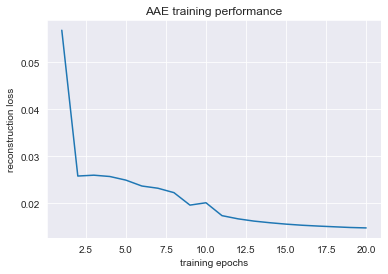

In [13]:
# plot the reconstruction loss per training epoch
plt.plot(range(1, len(epoch_reconstruction_losses)+1), epoch_reconstruction_losses)

# set plot title
plt.title('AAE training performance')

# set plot axis labels
plt.xlabel('training epochs')
plt.ylabel('reconstruction loss')

Text(0, 0.5, 'discrimination loss')

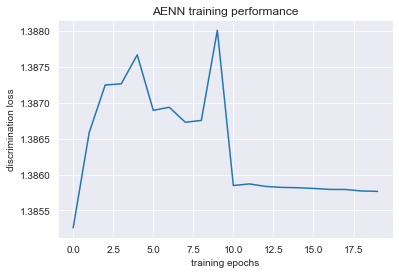

In [14]:
# plot the discriminator loss per training epoch
plt.plot(range(0, len(epoch_discriminator_losses)), epoch_discriminator_losses)

# set plot title
plt.title('AENN training performance')

# set plot axis labels
plt.xlabel('training epochs')
plt.ylabel('discrimination loss')

Text(0, 0.5, 'generation loss')

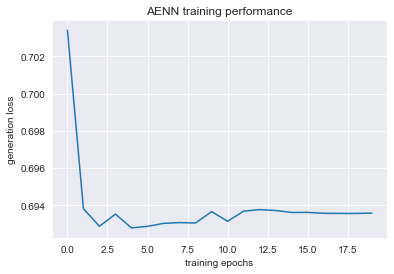

In [15]:
# plot the generator loss per training epoch
plt.plot(range(0, len(epoch_generator_losses)), epoch_generator_losses)

# set plot title
plt.title('AENN training performance')

# set plot axis labels
plt.xlabel('training epochs')
plt.ylabel('generation loss')

In [16]:
#print (urllib.request.pathname2url('./models/20210525-14_29_14_ep_10_decoder_model.pth'))

In [17]:

# restore pretrained model checkpoint

#encoder_model_name = 'file:' + urllib.request.pathname2url(r'./models/20210521-12_55_19_ep_10_encoder_model.pth')
#decoder_model_name = 'file:' + urllib.request.pathname2url(r'./models/20210521-12_55_19_ep_10_decoder_model.pth')

# Read stored model from the remote location
#encoder_bytes = urllib.request.urlopen(encoder_model_name)
#decoder_bytes = urllib.request.urlopen(decoder_model_name)

# Load tensor from io.BytesIO object
#encoder_buffer = io.BytesIO(encoder_bytes.read())
#decoder_buffer = io.BytesIO(decoder_bytes.read())

# init training network classes / architectures
#encoder_eval = Encoder(input_size=data_subset_transformed.shape[1], hidden_size=[256, 64, 16, 4, 2])
#decoder_eval = Decoder(output_size=data_subset_transformed.shape[1], hidden_size=[2, 4, 16, 64, 256])

#encoder_eval = Encoder(input_size=221, hidden_size=[256, 64, 16, 4, 2])
#decoder_eval = Decoder(output_size=221, hidden_size=[2, 4, 16, 64, 256])

# push to cuda if cudnn is available
#if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
#    encoder_eval = encoder_eval.cuda()
#    decoder_eval = decoder_eval.cuda()
    
# load trained models
#encoder_eval.load_state_dict(torch.load(encoder_buffer,map_location ='cpu'))
#decoder_eval.load_state_dict(torch.load(decoder_buffer,map_location ='cpu'))

encoder_eval = encoder_train
decoder_eval = decoder_train

In [18]:
data_subset_transformed.shape[1]

1359

In [19]:
# print the architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_eval))
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_eval))

[LOG 20210915-07:40:06] encoder architecture:

Encoder(
  (map_L1): Linear(in_features=1359, out_features=256, bias=True)
  (map_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L2): Linear(in_features=256, out_features=64, bias=True)
  (map_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L3): Linear(in_features=64, out_features=16, bias=True)
  (map_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L4): Linear(in_features=16, out_features=4, bias=True)
  (map_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L5): Linear(in_features=4, out_features=2, bias=True)
  (map_R5): LeakyReLU(negative_slope=0.4, inplace=True)
)

[LOG 20210915-07:40:06] decoder architecture:

Decoder(
  (map_L1): Linear(in_features=2, out_features=4, bias=True)
  (map_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L2): Linear(in_features=4, out_features=16, bias=True)
  (map_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (map_L3): Linear(in_features=16, out_features=64, bi

In [20]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(data_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader_eval = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=False, num_workers=0)

# determine if CUDA is available at the compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    
    # push dataloader to CUDA
    dataloader_eval = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=False)

In [21]:
# set networks in evaluation mode (don't apply dropout)
encoder_eval.eval()
decoder_eval.eval()

# init batch count
batch_count = 0

# iterate over epoch mini batches
for enc_transactions_batch in dataloader_eval:

    # determine latent space representation of all transactions
    z_enc_transactions_batch = encoder_eval(enc_transactions_batch)
    
    # case: initial batch 
    if batch_count == 0:

      # collect reconstruction errors of batch
      z_enc_transactions_all = z_enc_transactions_batch
      
    # case: non-initial batch
    else:
      
      # collect reconstruction errors of batch
      z_enc_transactions_all = torch.cat((z_enc_transactions_all, z_enc_transactions_batch), dim=0)
    
    # increase batch count
    batch_count += 1

# convert to numpy array
z_enc_transactions_all = z_enc_transactions_all.cpu().detach().numpy()


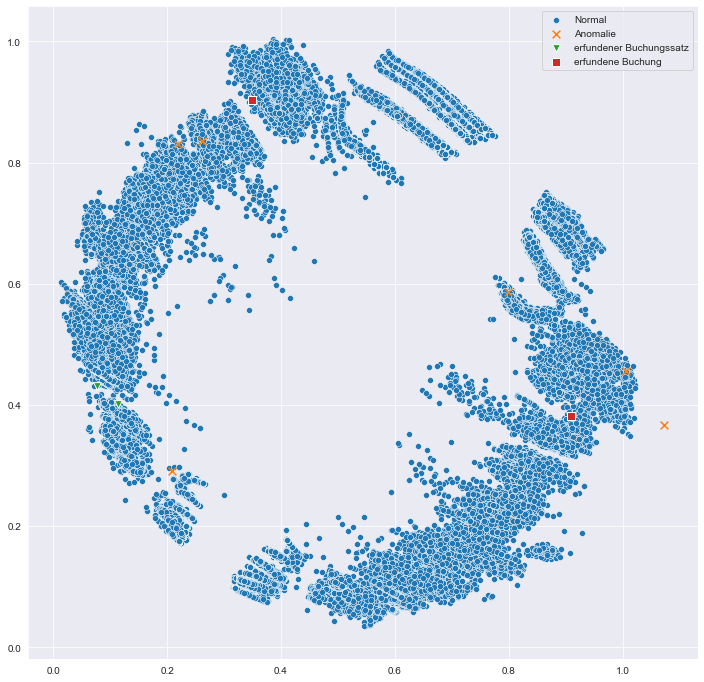

In [22]:
# prepare plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# obtain regular transactions as well as global and local anomalies
regular_data = z_enc_transactions_all[label == 'regular']
anomalie_data = z_enc_transactions_all[label == 'Anomalie']
anomalie_buchungssatz_data = z_enc_transactions_all[label == 'erfundener Buchungssatz']
anomalie_buchung_data = z_enc_transactions_all[label == 'erfundene Buchung']

# plot reconstruction error scatter plot
ax.scatter(regular_data[:, 0], regular_data[:, 1], c='C0', marker="o", label='Normal', edgecolors='w', linewidth=0.5) 
ax.scatter(anomalie_data[:, 0], anomalie_data[:, 1], c='C1', marker="x", label='Anomalie', edgecolors='w', s=60) 
ax.scatter(anomalie_buchungssatz_data[:, 0], anomalie_buchungssatz_data[:, 1], c='C2', marker="v", label='erfundener Buchungssatz', edgecolors='w', s=60) 
ax.scatter(anomalie_buchung_data[:, 0], anomalie_buchung_data[:, 1], c='C3', marker="s", label='erfundene Buchung', edgecolors='w', s=60) 

# add plot legend of transaction classes
ax.legend(loc='best');

In [23]:
# define euclidean distance calculation
def compute_euclid_distance(x, y):
    
    # calculate euclidean distance 
    euclidean_distance = np.sqrt(np.sum((x - y) ** 2, axis=1))
    
    # return euclidean distance
    return euclidean_distance

In [24]:
# determine distance to each mode
distances = np.apply_along_axis(func1d=compute_euclid_distance, axis=1, arr=z_enc_transactions_all, y=mu_gauss)

# determine mode divergence
mode_divergence = np.min(distances, axis=1)

# determine min-mode id
cluster_ids = np.argmin(distances, axis=1)    

In [25]:
# normalize the mode divergences of each mode

# prepare empty arrays of the same shape and dtype
mode_divergence_all_scaled = np.asarray(mode_divergence)

# iterate over the cluster modes
for cluster_id in np.unique(cluster_ids).tolist():
  
    # determine journal entries of current mode
    mask = cluster_ids == cluster_id

    # normalize mode journal entries mode divergence to the range [0,1]
    mode_divergence_all_scaled[mask] = (mode_divergence[mask] - mode_divergence[mask].min()) / (mode_divergence[mask].ptp())   

C:\Users\DEARIES2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


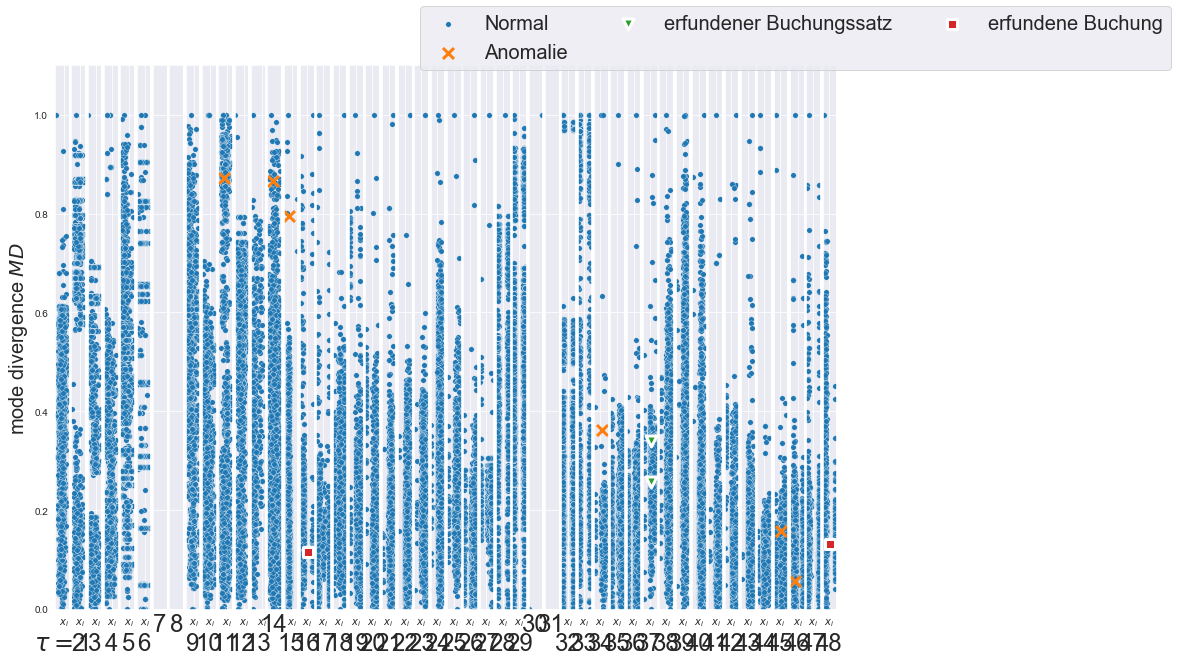

In [26]:

# collect anomaly score, labels and cluster assignments
plot_data = pd.concat([pd.Series(mode_divergence_all_scaled, name='mode_divergence'), 
                       pd.Series(label, name='label'),                        
                       pd.Series(cluster_ids, name='cluster_id')],
                     axis=1)

num_clusters = len(np.unique(cluster_ids))
# init sub-plots based on the number of modes
fig, axes = plt.subplots(1, num_clusters, sharey=True, figsize=(14, 10))


# iterate over distinct modes
for mode in range(0, num_clusters):

    plot_data = plot_data.sample(frac=1.0)
    # collect features of current mode
    z_mode = plot_data[plot_data['cluster_id'] == mode]

    regular_data = z_mode[z_mode['label'] == 'regular']
    anomalie_data = z_mode[z_mode['label'] == 'Anomalie']        
    anomalie_buchungssatz_data = z_mode[z_mode['label'] == 'erfundener Buchungssatz']
    anomalie_buchung_data =z_mode[z_mode['label'] == 'erfundene Buchung']

    # create train scatter plot of regular samples
    axes[mode].scatter(regular_data.index, regular_data['mode_divergence'], c='C0', marker='o', s=30, linewidth=0.3, label='Normal', edgecolors='w')
    axes[mode].scatter(anomalie_data.index, anomalie_data['mode_divergence'], c='C1', marker='x', s=120, linewidth=3, label='Anomalie', edgecolors='w')    
    axes[mode].scatter(anomalie_buchungssatz_data.index, anomalie_buchungssatz_data['mode_divergence'], c='C2', marker='v', s=120, linewidth=3, label='erfundener Buchungssatz', edgecolors='w')
    axes[mode].scatter(anomalie_buchung_data.index, anomalie_buchung_data['mode_divergence'], c='C3', marker='s', s=120, linewidth=3, label='erfundene Buchung', edgecolors='w')

    # create train scatter plot of local anomalies
    # axes[mode].scatter(local_outliers.index, local_outliers['mode_divergence'], c='C3', marker='x', s=120, linewidth=3, label='local', edgecolors='w')

    # set axis labels
    xlabel = '$\\tau={}$' + str(mode+1) if mode == 0 else str(mode+1)
    axes[mode].set_xlabel(xlabel, fontsize=24)

    # set axis limits
    axes[mode].set_ylim([0.0, 1.1])

    axes[mode].set_xticks([int(plot_data.shape[0]/2)])
    axes[mode].set_xticklabels(['$x_{i}$'])

# set axis labels
axes[0].set_ylabel('mode divergence $MD$', fontsize=20)

# add legend to plot
handles, labels = axes[2].get_legend_handles_labels()
plt.legend(handles, labels, loc='center', fontsize=20, ncol=3, borderaxespad=0.,
           bbox_to_anchor=(-6.5, 1., 9., .1))

# set grid and tight plotting layout
plt.grid(True)

In [27]:
z_mode.head(1000)
#sns.scatterplot(data=z_mode, x="cluster_id", y="mode_divergence", legend=False, sizes=(20, 2000))

,mode_divergence,label,cluster_id
25653,0.074287,regular,47
16533,0.138906,regular,47
25007,0.508855,regular,47
24468,0.375202,regular,47
32363,0.122176,regular,47
...,...,...,...
127531,0.105823,regular,47
127237,0.112957,regular,47
8567,0.062834,regular,47
19387,0.251466,regular,47


In [28]:
plot_data.groupby(['cluster_id']).count()

,mode_divergence,label
cluster_id,,
0,1742,1742
1,2135,2135
2,2983,2983
3,2945,2945
4,4424,4424
5,2409,2409
8,3834,3834
9,5576,5576
10,3620,3620


In [29]:
# define the optimization criterion / loss function
reconstruction_criterion_categorical_eval = nn.BCEWithLogitsLoss(reduction='none')
reconstruction_criterion_numeric_eval = nn.MSELoss(reduction='none')

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    reconstruction_criterion_categorical_eval = reconstruction_criterion_categorical_eval.cuda()
    reconstruction_criterion_numeric_eval = reconstruction_criterion_numeric_eval.cuda()

# set networks in evaluation mode (don't apply dropout)
encoder_eval.eval()
decoder_eval.eval()

# init batch count
batch_count = 0

# iterate over epoch mini batches
for enc_transactions_batch in dataloader_eval:

    # determine latent space representation of all transactions
    z_enc_transactions_batch = encoder_eval(enc_transactions_batch)

    # reconstruct input samples
    reconstruction_batch = decoder_eval(z_enc_transactions_batch)

    # split input transactions into numeric and categorical parts
    input_cat_all = enc_transactions_batch[:, :data_categ_transformed.shape[1]]
    input_num_all = enc_transactions_batch[:, data_categ_transformed.shape[1]:]

    # split reconstruction into numeric and categorical parts
    rec_cat_all = reconstruction_batch[:, :data_categ_transformed.shape[1]]
    rec_num_all = reconstruction_batch[:, data_categ_transformed.shape[1]:]

    # compute rec error
    rec_error_cat_all = reconstruction_criterion_categorical_eval(input=rec_cat_all, target=input_cat_all).mean(dim=1)
    rec_error_num_all = reconstruction_criterion_numeric_eval(input=rec_num_all, target=input_num_all).mean(dim=1)

    # combine categorical and numerical errors
    rec_error_all_batch = rec_error_cat_all + rec_error_num_all
    
    # case: initial batch
    if batch_count == 0:
    
      # collect reconstruction errors of batch
      rec_error_all = rec_error_all_batch
    
    # case: non-initial batch
    else:
      
      # collect reconstruction errors of batch
      rec_error_all = torch.cat((rec_error_all, rec_error_all_batch), dim=0)
    
    # increase batch count
    batch_count += 1

# convert to numpy array
rec_error_all = rec_error_all.cpu().detach().numpy()

In [30]:
# normalize the reconstruction errors of each mode

# prepare empty arrays of the same shape and dtype
rec_error_all_scaled = np.asarray(rec_error_all)

# iterate over the cluster modes
for cluster_id in np.unique(cluster_ids).tolist():
  
    # determine journal entries of current mode
    mask = cluster_ids == cluster_id

    # normalize mode journal entries reconstruction error to the range [0,1]
    rec_error_all_scaled[mask] = (rec_error_all[mask] - rec_error_all[mask].min()) / (rec_error_all[mask].ptp())

C:\Users\DEARIES2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


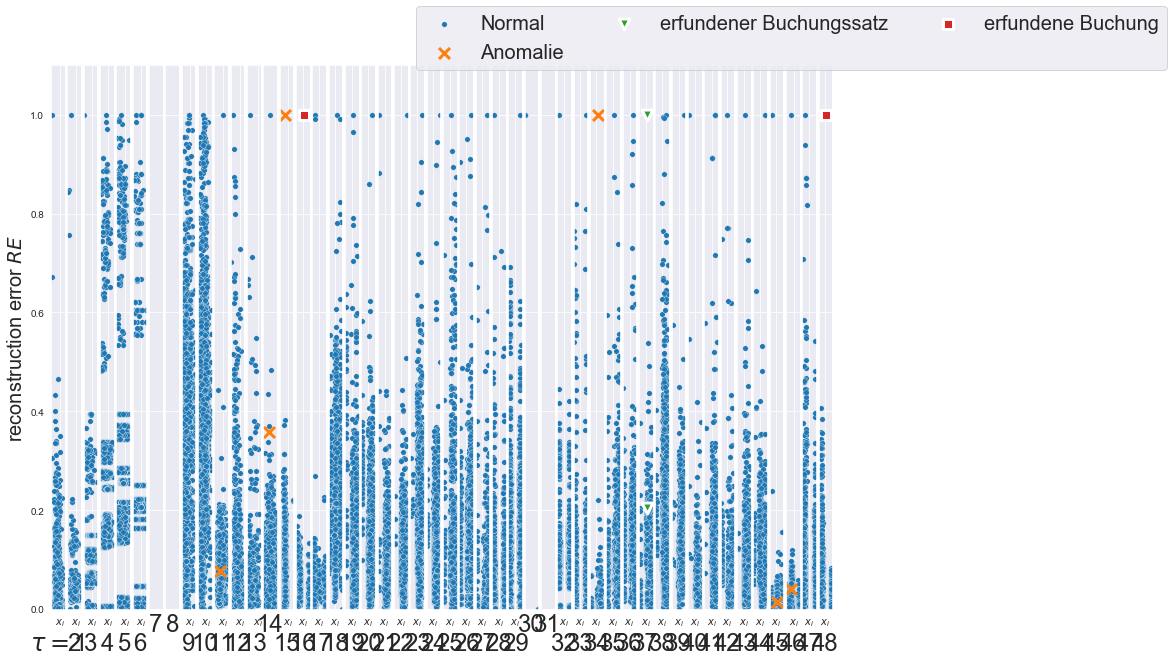

In [31]:

# collect anomaly score, labels and cluster assignments
plot_data = pd.concat([pd.Series(rec_error_all_scaled, name='rec_error'), 
                       pd.Series(label, name='label'),                        
                       pd.Series(cluster_ids, name='cluster_id')],
                     axis=1)

num_clusters = len(np.unique(cluster_ids))
# init sub-plots based on the number of modes
fig, axes = plt.subplots(1, num_clusters, sharey=True, figsize=(14, 10))


# iterate over distinct modes
for mode in range(0, num_clusters):

    plot_data = plot_data.sample(frac=1.0)
    # collect features of current mode
    z_mode = plot_data[plot_data['cluster_id'] == mode]

    regular_data = z_mode[z_mode['label'] == 'regular']
    anomalie_data = z_mode[z_mode['label'] == 'Anomalie']        
    anomalie_buchungssatz_data = z_mode[z_mode['label'] == 'erfundener Buchungssatz']
    anomalie_buchung_data =z_mode[z_mode['label'] == 'erfundene Buchung']

    # create train scatter plot of regular samples
    axes[mode].scatter(regular_data.index, regular_data['rec_error'], c='C0', marker='o', s=30, linewidth=0.3, label='Normal', edgecolors='w')
    axes[mode].scatter(anomalie_data.index, anomalie_data['rec_error'], c='C1', marker='x', s=120, linewidth=3, label='Anomalie', edgecolors='w')    
    axes[mode].scatter(anomalie_buchungssatz_data.index, anomalie_buchungssatz_data['rec_error'], c='C2', marker='v', s=120, linewidth=3, label='erfundener Buchungssatz', edgecolors='w')
    axes[mode].scatter(anomalie_buchung_data.index, anomalie_buchung_data['rec_error'], c='C3', marker='s', s=120, linewidth=3, label='erfundene Buchung', edgecolors='w')

    # set axis labels
    xlabel = '$\\tau={}$' + str(mode+1) if mode == 0 else str(mode+1)
    axes[mode].set_xlabel(xlabel, fontsize=24)

    # set axis limits
    axes[mode].set_ylim([0.0, 1.1])

    axes[mode].set_xticks([int(plot_data.shape[0]/2)])
    axes[mode].set_xticklabels(['$x_{i}$'])

# set axis labels
axes[0].set_ylabel('reconstruction error $RE$', fontsize=20)

# add legend to plot
handles, labels = axes[2].get_legend_handles_labels()
plt.legend(handles, labels, loc='center', fontsize=20, ncol=3, borderaxespad=0.,
           bbox_to_anchor=(-6.5, 1., 9., .1))

# set grid and tight plotting layout
plt.grid(True)

In [32]:
# set alpha 
alpha = 0.4

# determine journal entry anomaly score
anomaly_score = alpha * rec_error_all_scaled + (1.0 - alpha) * mode_divergence_all_scaled

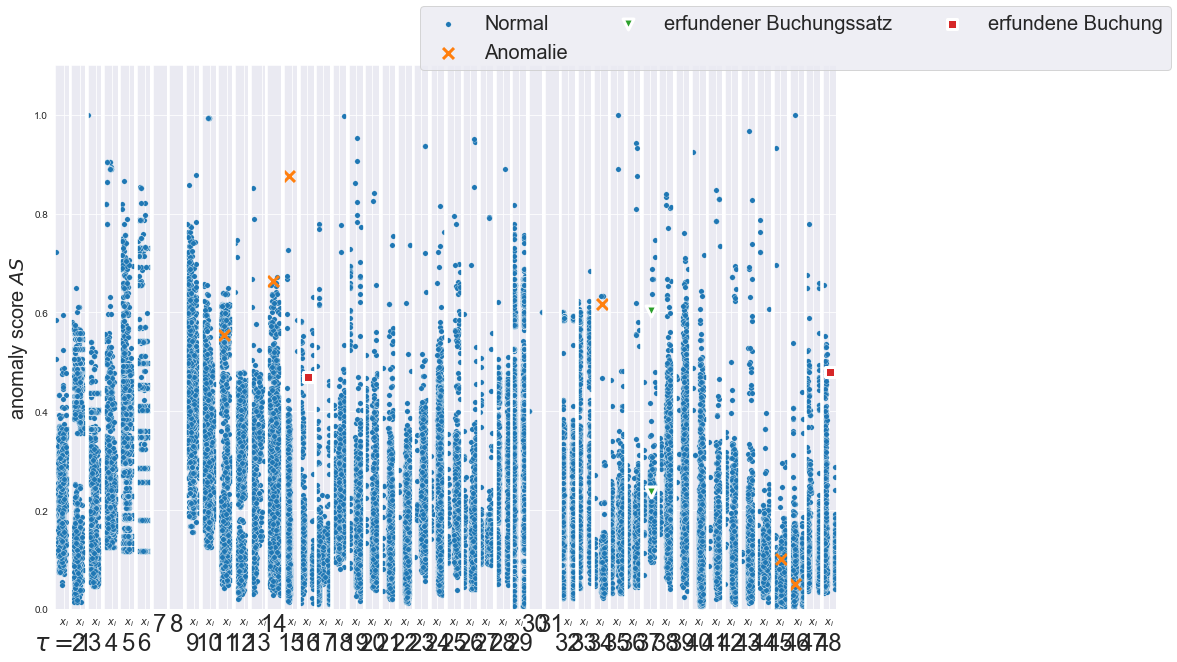

In [33]:

# collect anomaly score, labels and cluster assignments
plot_data = pd.concat([pd.Series(anomaly_score, name='anomaly_score'), 
                       pd.Series(label, name='label'),                        
                       pd.Series(cluster_ids, name='cluster_id')],
                     axis=1)

num_clusters = len(np.unique(cluster_ids))
# init sub-plots based on the number of modes
fig, axes = plt.subplots(1, num_clusters, sharey=True, figsize=(14, 10))

# iterate over distinct modes
for mode in range(0, num_clusters):

    plot_data = plot_data.sample(frac=1.0)
    # collect features of current mode
    z_mode = plot_data[plot_data['cluster_id'] == mode]

    regular_data = z_mode[z_mode['label'] == 'regular']
    anomalie_data = z_mode[z_mode['label'] == 'Anomalie']        
    anomalie_buchungssatz_data = z_mode[z_mode['label'] == 'erfundener Buchungssatz']
    anomalie_buchung_data =z_mode[z_mode['label'] == 'erfundene Buchung']

    # create train scatter plot of regular samples
    axes[mode].scatter(regular_data.index, regular_data['anomaly_score'], c='C0', marker='o', s=30, linewidth=0.3, label='Normal', edgecolors='w')
    axes[mode].scatter(anomalie_data.index, anomalie_data['anomaly_score'], c='C1', marker='x', s=120, linewidth=3, label='Anomalie', edgecolors='w')    
    axes[mode].scatter(anomalie_buchungssatz_data.index, anomalie_buchungssatz_data['anomaly_score'], c='C2', marker='v', s=120, linewidth=3, label='erfundener Buchungssatz', edgecolors='w')
    axes[mode].scatter(anomalie_buchung_data.index, anomalie_buchung_data['anomaly_score'], c='C3', marker='s', s=120, linewidth=3, label='erfundene Buchung', edgecolors='w')

    # set axis labels
    xlabel = '$\\tau={}$' + str(mode+1) if mode == 0 else str(mode+1)
    axes[mode].set_xlabel(xlabel, fontsize=24)

    # set axis limits
    axes[mode].set_ylim([0.0, 1.1])

    axes[mode].set_xticks([int(plot_data.shape[0]/2)])
    axes[mode].set_xticklabels(['$x_{i}$'])

# set axis labels
axes[0].set_ylabel('anomaly score $AS$', fontsize=20)

# add legend to plot
handles, labels = axes[2].get_legend_handles_labels()
plt.legend(handles, labels, loc='center', fontsize=20, ncol=3, borderaxespad=0.,
           bbox_to_anchor=(-6.5, 1., 9., .1))

# set grid and tight plotting layout
plt.grid(True)

In [34]:
data['label'] = label
data['tau'] = cluster_ids

data[(anomaly_score >= 0.8)]


C:\Users\DEARIES2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


,ID,GL Account Number,Functional Amount Haben,Functional Amount Soll,Effective Date,Effective Weekday,Period,Entry Date,Entry Weekday,Source,...,JE Line Description,ey_sys_man_ind,GL Account Name,Account Type,Account Class,Account Sub Type,Account Sub Class,BilPosSL,label,tau
7206,3701000014_001,0098000302,0.00,2.66,2020-03-01,Sunday,03,2020-03-23,Monday,9O,...,,Manual,Zwischenkonto ZA/ZE Wertpapiere/SSD,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular,39
8360,3708000048_281,0010412018,1287.00,0.00,2020-05-31,Sunday,05,2020-05-29,Friday,ZF,...,AFB0,Manual,Wertberichtigung Betriebs- u. Geschäft. (FI-AA),01. | A K T I V A,01.03.02. | Sachanlagen,01.03. | Anlagevermögen,01.03.02.03. | Andere Anlagen sowie B. & G.-au...,A1032032,regular,28
17904,0032001540_002,0098900011,0.01,0.00,2020-03-31,Tuesday,03,2020-03-27,Friday,VG,...,,System,Interimskonto sonstiges,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204001,regular,12
22765,3011004888_001,0010331041,0.00,55.69,2020-04-27,Monday,04,2020-04-27,Monday,VB,...,,Manual,Forderungen aus Vorsteuer,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A1042040.1,regular,45
22767,3011003413_001,0010331041,0.00,55.69,2020-03-30,Monday,03,2020-03-30,Monday,VB,...,,Manual,Forderungen aus Vorsteuer,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A1042040.1,regular,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107920,0020001904_013,0075400100,0.01,0.00,2020-04-22,Wednesday,04,2020-04-22,Wednesday,KN,...,2502,Manual,KFZ-Kosten Innendienst,03. | Gewinn- und Verlust-Rechnung,03.04.02. | Übrige sonstige betriebliche Aufwe...,03.04. | Sonstige betriebliche Aufwendungen,03.04.02.08. | Kraftfahrzeugkosten,G3082060,regular,22
111786,0028000016_001,0015599998,15000000.00,0.00,2020-05-05,Tuesday,05,2020-05-04,Monday,IP,...,,Manual,manuelle Zahlungen DTA/Überw. Ausgang Verrechnung,01. | A K T I V A,01.04.03. | Forderungen und so. Vermögensgegen...,01.04. | Umlaufvermögen,01.04.03.05. | Sonstige Vermögensgegenstände,A104204020,regular,17
117340,0054000432_094,0077002000,0.00,5739823.20,2020-12-16,Wednesday,12,2020-12-16,Wednesday,P1,...,D0,Manual,Dienstl. Aufwendungen GD,03. | Gewinn- und Verlust-Rechnung,03.04.02. | Übrige sonstige betriebliche Aufwe...,03.04. | Sonstige betriebliche Aufwendungen,03.04.02.10. | Aufwendungen für bezogene Leist...,G3082075,regular,37
119872,0032005195_002,0010333020,0.01,0.00,2020-12-29,Tuesday,12,2020-12-29,Tuesday,VG,...,,Manual,Ford./Verb. an BK 0120 BADENIA,02. | P A S S I V A,02.05.06. | Verbindlichkeiten ggü. verb. Unter...,02.05. | Verbindlichkeiten,02.05.06.05. | Verbindlichkeiten ggü. verb. U ...,P20560005,regular,25
